<a href="https://colab.research.google.com/github/PedroLucasMendes/AguaML-Classifier/blob/main/agua_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("water_potability.csv")

In [12]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [13]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


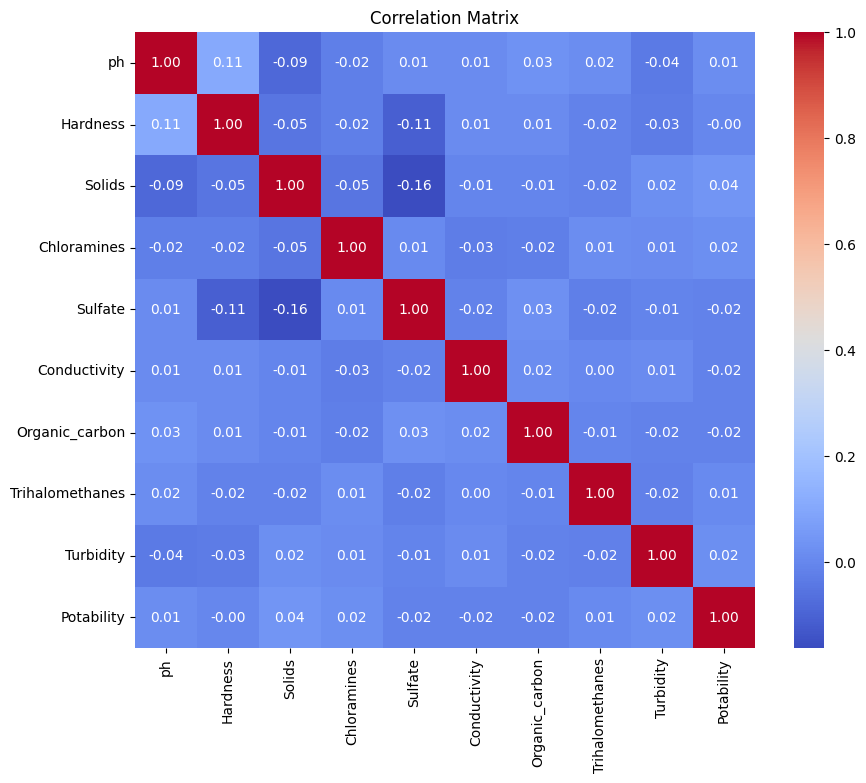

In [16]:
# Suponha que 'df' seja o seu DataFrame contendo os dados
# Vamos usar apenas as colunas numéricas para calcular a correlação
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()

# Criar o heatmap usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

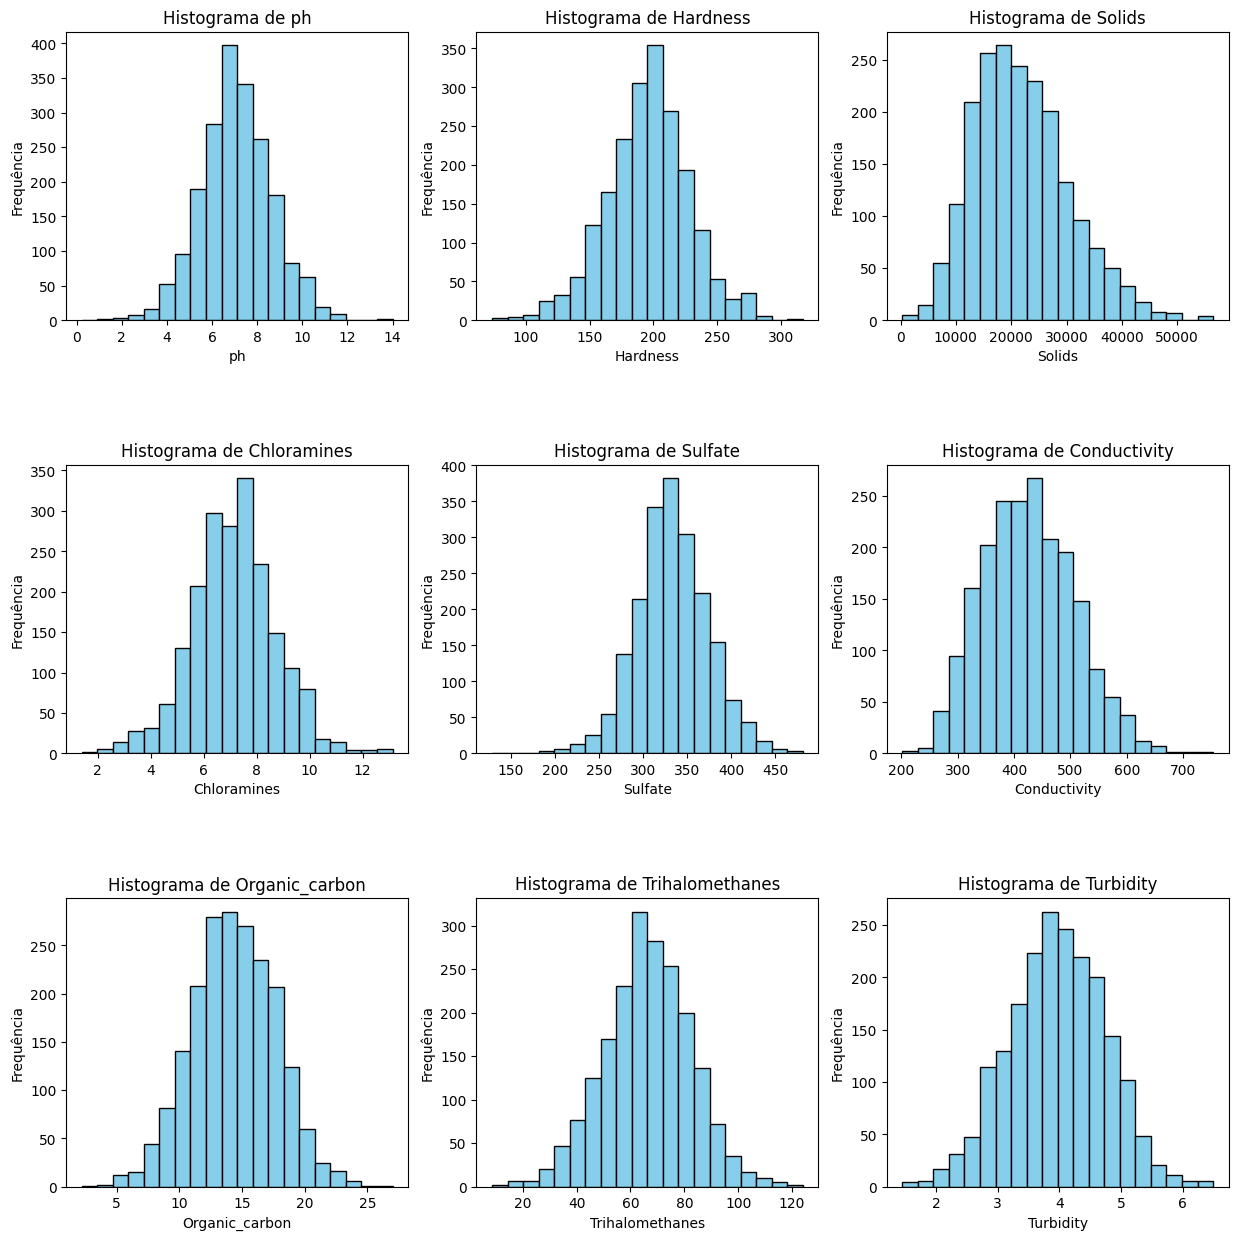

In [18]:

# Lista de variáveis preditoras (exceto o rótulo)
features = df.columns.drop('Potability')

# Configurações para o layout do subplot
num_plots = len(features)
num_cols = 3
num_rows = num_plots // num_cols + (1 if num_plots % num_cols > 0 else 0)

# Criando o subplot para os histogramas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=0.5)

# Loop sobre as variáveis preditoras para criar os histogramas
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Criando o histograma para a variável atual
    df[feature].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f'Histograma de {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequência')

# Se houverem subplots não preenchidos, removê-los
for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()